In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp
#%matplotlib widget
import serial,socket,os,glob,sys
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
import tifffile as tif
import skimage as sk
from IPython.display import Latex
from funciones_wake import *
from scipy.signal import find_peaks
mks = ['s','o','>','p','v','^','*']




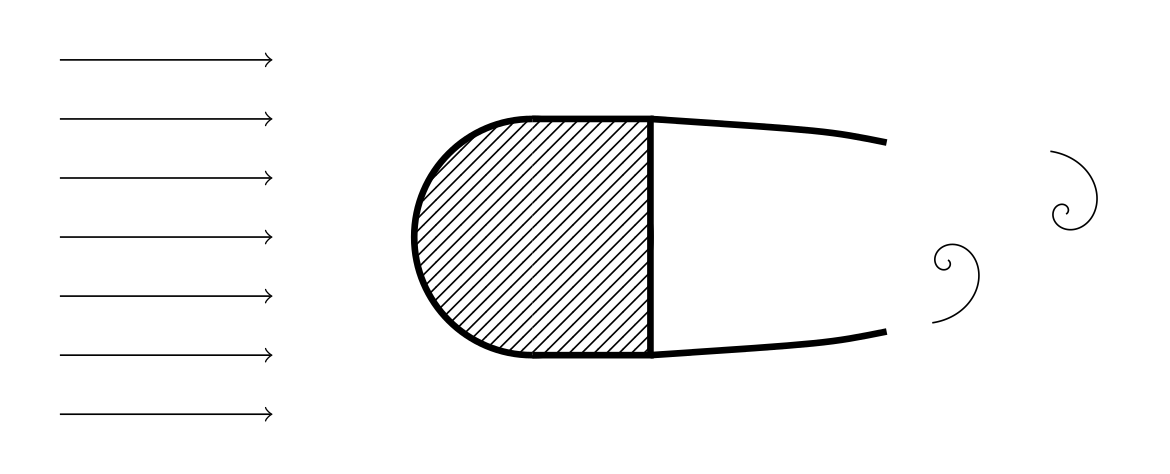

In [2]:
if __name__ == "__main__":
    file_name = "medidas/Dshape_e00_L000_deltaV0_0"
    modified_date = get_modified_date(file_name)
    print(modified_date[1])

1724939542.2217321


In [3]:
beta_nL(0),freq_elast(beta_nL(0),5e-2,45e-5,1300,75)

(1.8751040687120684, 15.206694613354841)

In [4]:
rho = 1.2
Lspan= 35e-2
D = 5e-2
Sf = Lspan*D
nu = 15e-6
scale_force = 1/241  # de gramo a newton  

rho_50 = 1305
rho_75 = 1902
y1_50 = 37e-3
y1_75 = 50e-3

In [5]:
lista_soporte = np.sort(glob.glob('medidas/Dshape_soporte_V*'))
caso_soporte = caso_drag(lista_soporte)
lista_referencia = np.sort(glob.glob('medidas/Dshape_e00*'))
caso_referencia = caso_drag(lista_referencia)
lista_e50_L075 = np.sort(glob.glob('medidas/Dshape_e50_L075*'))
caso_e50_L075 = caso_drag(lista_e50_L075)
lista_e50_L100 = np.sort(glob.glob('medidas/Dshape_e50_L100*'))
caso_e50_L100 = caso_drag(lista_e50_L100)
lista_e50_L125 = np.sort(glob.glob('medidas/Dshape_e50_L125*'))
caso_e50_L125 = caso_drag(lista_e50_L125)
lista_e50_L150 = np.sort(glob.glob('medidas/Dshape_e50_L150*'))
caso_e50_L150 = caso_drag(lista_e50_L150)



lista_e75_L075 = np.sort(glob.glob('medidas/Dshape_e75_L075*'))
caso_e75_L075 = caso_drag(lista_e75_L075)
lista_e75_L100 = np.sort(glob.glob('medidas/Dshape_e75_L100*'))
caso_e75_L100 = caso_drag(lista_e75_L100)
lista_e75_L125 = np.sort(glob.glob('medidas/Dshape_e75_L125*'))
caso_e75_L125 = caso_drag(lista_e75_L125)
lista_e75_L150 = np.sort(glob.glob('medidas/Dshape_e75_L150*'))
caso_e75_L150 = caso_drag(lista_e75_L150)


lista_e1000_L075 = np.sort(glob.glob('medidas/Dshape_e1000_L075*'))
caso_e1000_L075 = caso_drag(lista_e1000_L075)
lista_e1000_L100 = np.sort(glob.glob('medidas/Dshape_e1000_L100*'))
caso_e1000_L100 = caso_drag(lista_e1000_L100)
lista_e1000_L125 = np.sort(glob.glob('medidas/Dshape_e1000_L125*'))
caso_e1000_L125 = caso_drag(lista_e1000_L125)
lista_e1000_L150 = np.sort(glob.glob('medidas/Dshape_e1000_L150*'))
caso_e1000_L150 = caso_drag(lista_e1000_L150)




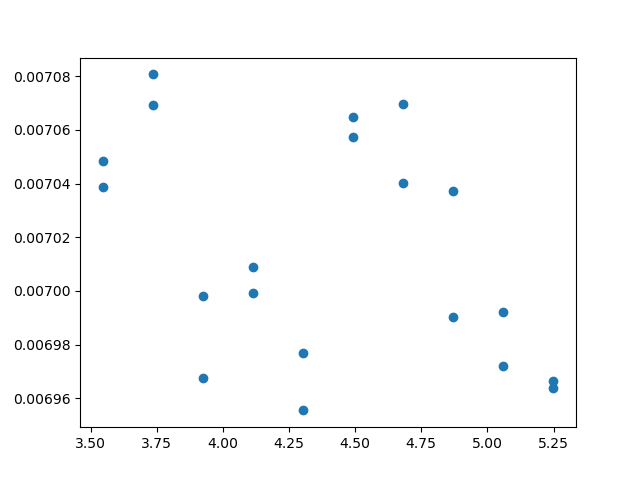

In [6]:
fig,ax = plt.subplots()

FD_s = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s = caso_soporte.df['velocity'][caso_soporte.index_casos]
ax.plot(U_s,FD_s/(1/2*rho*U_s**2),'o')
#ax.set_ylim([0,2])




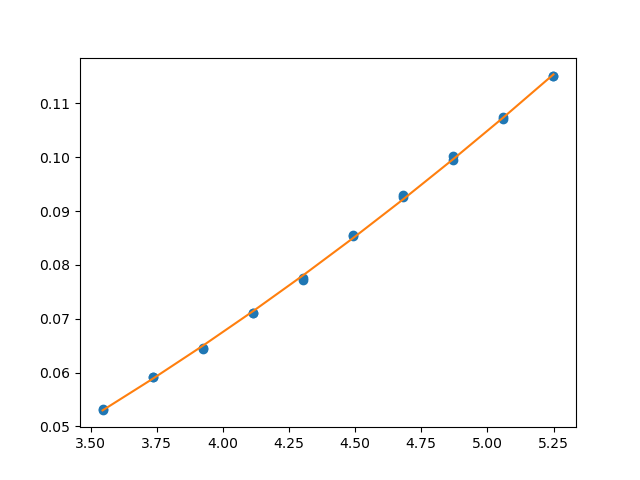

In [7]:
fig,ax = plt.subplots()

FD_s_soporte = caso_soporte.df['FD_m'][caso_soporte.index_casos]
U_s_soporte = caso_soporte.df['velocity'][caso_soporte.index_casos]

p1_soporte = np.polyfit(U_s_soporte,FD_s_soporte,2)
F_soporte = np.poly1d(p1_soporte)

ax.plot(U_s_soporte,FD_s_soporte,'o')
ax.plot(U_s_soporte,F_soporte(U_s_soporte))
#ax.set_ylim([0,2])

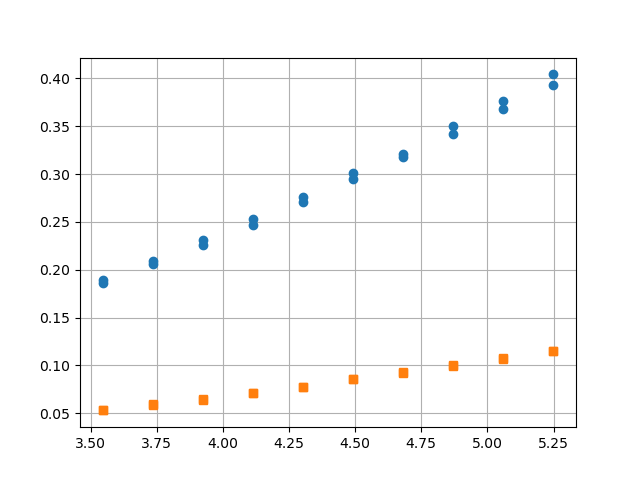

In [8]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
ax.plot(U_s_referencia,FD_s_referencia,'o')
ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()

Text(0.5, 0, 'Re')

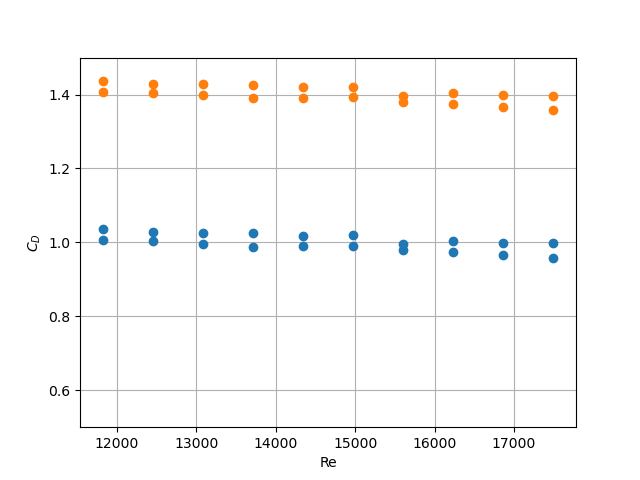

In [9]:
fig,ax = plt.subplots()

FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia*D/nu,FD_0/U_s_referencia**2/Sf/rho/0.5,'o')
ax.plot(U_s_referencia*D/nu,FD_s_referencia/U_s_referencia**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
ax.set_ylim([0.5,1.5])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re')

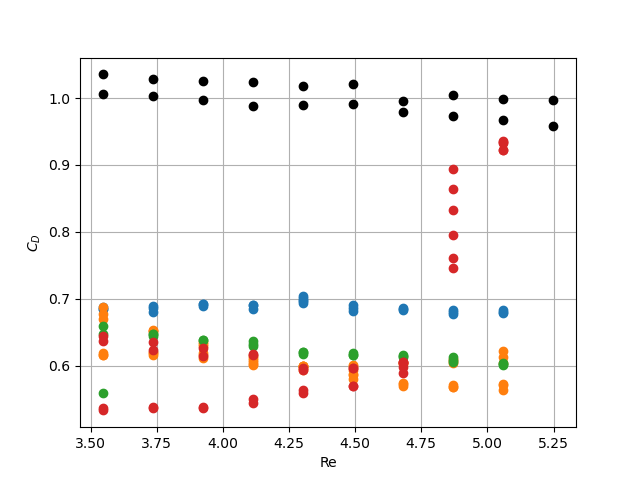

In [10]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e50_L075 = caso_e50_L075.df['FD_m'][caso_e50_L075.index_casos]
U_s_e50_L075 = caso_e50_L075.df['velocity'][caso_e50_L075.index_casos]
FD_0 =  FD_s_e50_L075-F_soporte(U_s_e50_L075)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L075,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')


FD_s_e50_L100 = caso_e50_L100.df['FD_m'][caso_e50_L100.index_casos]
U_s_e50_L100 = caso_e50_L100.df['velocity'][caso_e50_L100.index_casos]
FD_0 =  FD_s_e50_L100-F_soporte(U_s_e50_L100)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L100,FD_0/U_s_e50_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e50_L125 = caso_e50_L125.df['FD_m'][caso_e50_L125.index_casos]
U_s_e50_L125 = caso_e50_L125.df['velocity'][caso_e50_L125.index_casos]
FD_0 =  FD_s_e50_L125-F_soporte(U_s_e50_L125)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L125,FD_0/U_s_e50_L125**2/Sf/rho/0.5,'o')

FD_s_e50_L150 = caso_e50_L150.df['FD_m'][caso_e50_L150.index_casos]
U_s_e50_L150 = caso_e50_L150.df['velocity'][caso_e50_L150.index_casos]
FD_0 =  FD_s_e50_L150-F_soporte(U_s_e50_L150)
#ax.plot(U_s_e50_L075*D/nu,FD_0/U_s_e50_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e50_L150,FD_0/U_s_e50_L150**2/Sf/rho/0.5,'o')

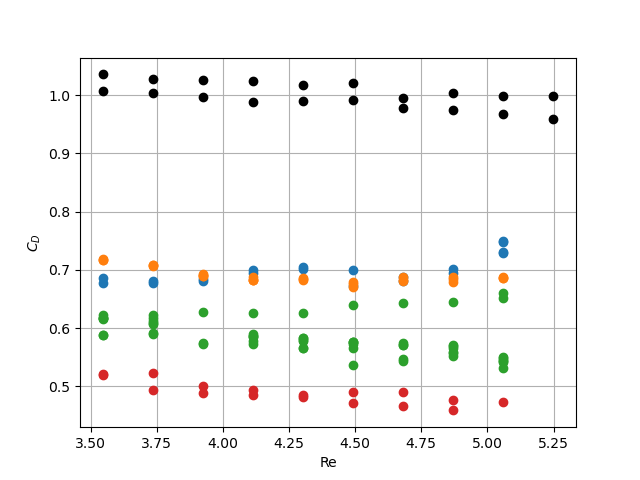

In [11]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e75_L075 = caso_e75_L075.df['FD_m'][caso_e75_L075.index_casos]
U_s_e75_L075 = caso_e75_L075.df['velocity'][caso_e75_L075.index_casos]
FD_0 =  FD_s_e75_L075-F_soporte(U_s_e75_L075)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L075,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')


FD_s_e75_L100 = caso_e75_L100.df['FD_m'][caso_e75_L100.index_casos]
U_s_e75_L100 = caso_e75_L100.df['velocity'][caso_e75_L100.index_casos]
FD_0 =  FD_s_e75_L100-F_soporte(U_s_e75_L100)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L100,FD_0/U_s_e75_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e75_L125 = caso_e75_L125.df['FD_m'][caso_e75_L125.index_casos]
U_s_e75_L125 = caso_e75_L125.df['velocity'][caso_e75_L125.index_casos]
FD_0 =  FD_s_e75_L125-F_soporte(U_s_e75_L125)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L125,FD_0/U_s_e75_L125**2/Sf/rho/0.5,'o')

FD_s_e75_L150 = caso_e75_L150.df['FD_m'][caso_e75_L150.index_casos]
U_s_e75_L150 = caso_e75_L150.df['velocity'][caso_e75_L150.index_casos]
FD_0 =  FD_s_e75_L150-F_soporte(U_s_e75_L150)
#ax.plot(U_s_e75_L075*D/nu,FD_0/U_s_e75_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e75_L150,FD_0/U_s_e75_L150**2/Sf/rho/0.5,'o')

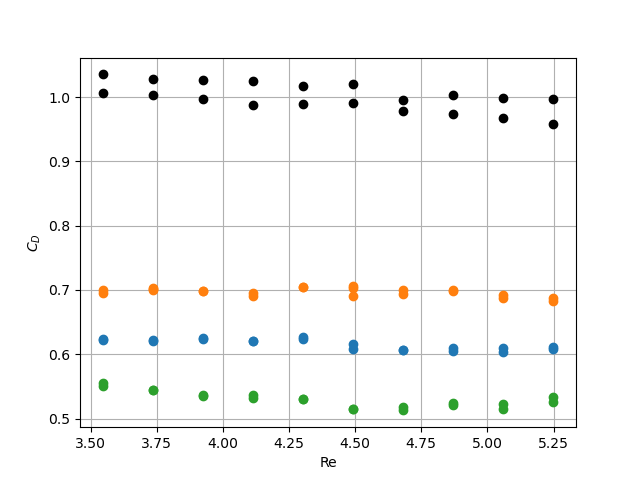

In [56]:
fig,ax = plt.subplots()


FD_s_referencia = caso_referencia.df['FD_m'][caso_referencia.index_casos]
U_s_referencia = caso_referencia.df['velocity'][caso_referencia.index_casos]
FD_0 =  FD_s_referencia-F_soporte(U_s_referencia)
ax.plot(U_s_referencia,FD_0/U_s_referencia**2/Sf/rho/0.5,'ko')

FD_s_e1000_L075 = caso_e1000_L075.df['FD_m'][caso_e1000_L075.index_casos]
U_s_e1000_L075 = caso_e1000_L075.df['velocity'][caso_e1000_L075.index_casos]
FD_0 =  FD_s_e1000_L075-F_soporte(U_s_e1000_L075)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L075,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')


FD_s_e1000_L100 = caso_e1000_L100.df['FD_m'][caso_e1000_L100.index_casos]
U_s_e1000_L100 = caso_e1000_L100.df['velocity'][caso_e1000_L100.index_casos]
FD_0 =  FD_s_e1000_L100-F_soporte(U_s_e1000_L100)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
#x.plot(U_s_e1000_L100,FD_0/U_s_e1000_L100**2/Sf/rho/0.5,'o')
#ax.plot(U_s_soporte,FD_s_soporte,'s')
ax.grid()
#ax.set_ylim([0.25,1.])
ax.set_ylabel('$C_D$')
ax.set_xlabel('Re');


FD_s_e1000_L125 = caso_e1000_L125.df['FD_m'][caso_e1000_L125.index_casos]
U_s_e1000_L125 = caso_e1000_L125.df['velocity'][caso_e1000_L125.index_casos]
FD_0 =  FD_s_e1000_L125-F_soporte(U_s_e1000_L125)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L125,FD_0/U_s_e1000_L125**2/Sf/rho/0.5,'o')

FD_s_e1000_L150 = caso_e1000_L150.df['FD_m'][caso_e1000_L150.index_casos]
U_s_e1000_L150 = caso_e1000_L150.df['velocity'][caso_e1000_L150.index_casos]
FD_0 =  FD_s_e1000_L150-F_soporte(U_s_e1000_L150)
#ax.plot(U_s_e1000_L075*D/nu,FD_0/U_s_e1000_L075**2/Sf/rho/0.5,'o')
ax.plot(U_s_e1000_L150,FD_0/U_s_e1000_L150**2/Sf/rho/0.5,'o')


# Estudio de Strouhal

Text(0.5, 0, 'Re')

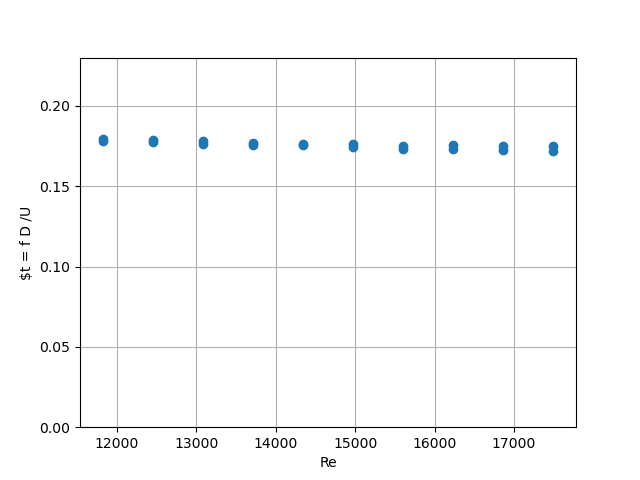

In [13]:
caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]
fig,ax = plt.subplots()
ax.plot(U_s_referencia*D/nu,fr_strouhal_s/U_s_referencia*D,'o')
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('$t = f D /U')
ax.set_xlabel('Re')

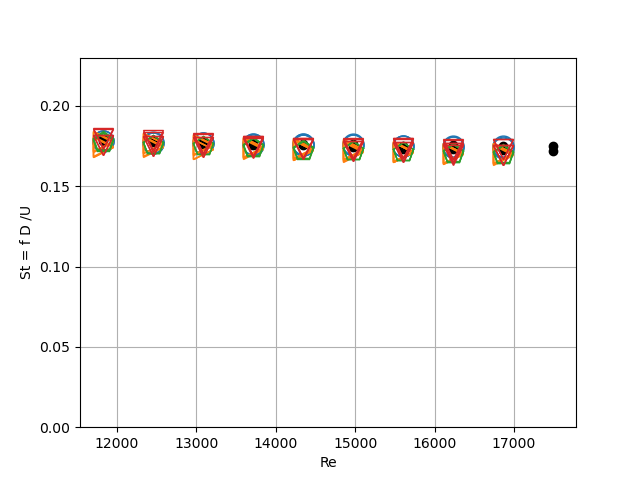

In [14]:

caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]
fig,ax = plt.subplots()
ax.plot(U_s_referencia*D/nu,fr_strouhal_s/U_s_referencia*D,'ko')

St_referencia = (fr_strouhal_s/U_s_referencia*D).mean()


casos_e50 = [caso_e50_L075,caso_e50_L100,caso_e50_L125,caso_e50_L150]
for k,casoi in enumerate( casos_e50):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        fr_strouhal[i] = fr_st[0]
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k+1],
            linestyle='None',fillstyle='none',markersize=15)
    
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('St = f D /U')
ax.set_xlabel('Re');









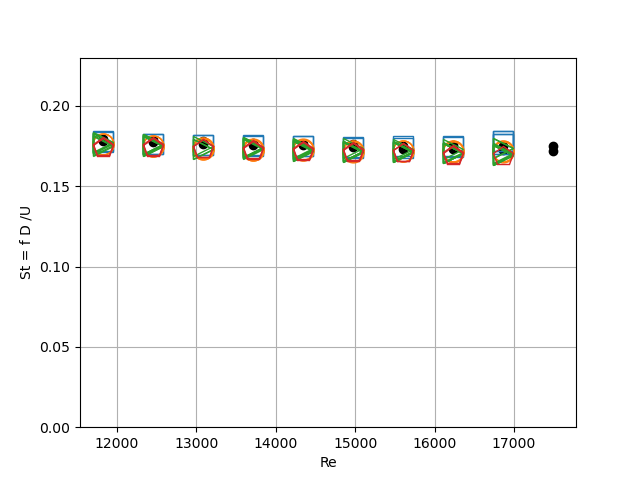

In [15]:
plt.close('all')
fig,ax = plt.subplots()
caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]

ax.plot(U_s_referencia*D/nu,fr_strouhal_s/U_s_referencia*D,'ko')

casos_e75 = [caso_e75_L075,caso_e75_L100,caso_e75_L125,caso_e75_L150]
for k,casoi in enumerate( casos_e75):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        try:
            fr_strouhal[i] = fr_st[0]
        except IndexError:
            fr_strouhal[i] = 0
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k],
            linestyle='None',fillstyle='none',markersize=15)
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('St = f D /U')
ax.set_xlabel('Re');



Text(0.5, 0, 'Re')

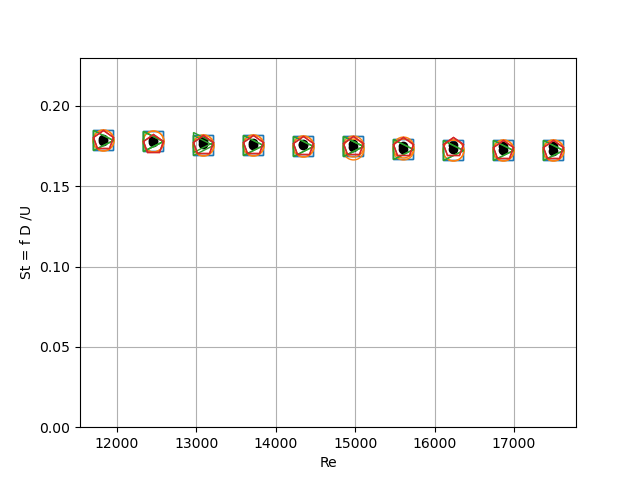

In [16]:
plt.close('all')
fig,ax = plt.subplots()
caso_referencia.freq_strouhal()
fr_strouhal_s = np.zeros_like(U_s_referencia)
for i,fr_st in enumerate(caso_referencia.strouhal_freq):
    fr_strouhal_s[i] = fr_st[0]

ax.plot(U_s_referencia*D/nu,fr_strouhal_s/U_s_referencia*D,'ko')

casos_e1000 = [caso_e1000_L075,caso_e1000_L100,caso_e1000_L125,caso_e1000_L150]
for k,casoi in enumerate( casos_e1000):
    casoi.freq_strouhal()
    U_si = casoi.df['velocity'][casoi.index_casos]
    fr_strouhal = np.zeros_like(U_si)
    for i,fr_st in enumerate(casoi.strouhal_freq):
        try:
            fr_strouhal[i] = fr_st[0]
        except IndexError:
            fr_strouhal[i] = 0
    ax.plot(U_si*D/nu,fr_strouhal/U_si*D,marker=mks[k],
            linestyle='None',fillstyle='none',markersize=15)
ax.set_ylim([0,0.23]);
ax.grid()
ax.set_ylabel('St = f D /U')
ax.set_xlabel('Re')

# Desplazamientos

## datos de imágenes de cámara rápida

In [17]:

fsampling = 250
lista_cam = np.sort(glob.glob('/media/juan/JUAN_PMMH/LFD/photron/dshape*'))
lista_casos = np.array([s for s in lista_cam if "_v0_" not in s])

lista_write =  np.sort(glob.glob('/home/juan/Documents/script_python/2024_flapflexwake/fastcam_coords/*.csv'))


dirw = '/home/juan/Documents/script_python/2024_flapflexwake/fastcam_stats/'
lista_objs = np.sort(glob.glob(dirw+'*.pickle'))

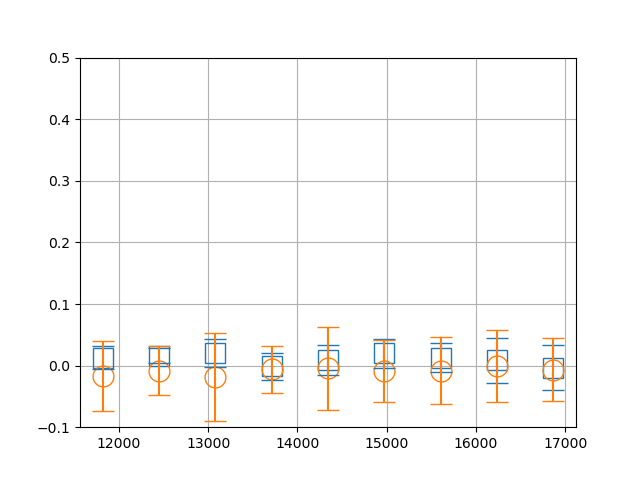

In [18]:
plot_displac(lista_objs,75,0.75)

In [44]:
t,L = [50,1]
vals_50 = []

lista_casos_t = np.array([s for s in lista_objs if f"t{int(t):03d}_" in s])
Largos  = np.array([0.75,1,1.25,1.5])
for j, L in enumerate(Largos):
    
    lista_casos_tL = np.array([s for s in lista_casos_t if f"L{int(L*100):03d}_" in s])
    data_obj_50 = get_dataframe(lista_objs,t,L) 
    for i,filei in enumerate(lista_casos_tL):
        file_aux = open(filei, 'rb')
        data = pickle.load(file_aux)
        #print(data.files[0])
        data.wakeflex()
        data.caso_drag()
        data.caso_drag_fft()
        data.caso_drag_strouhal()
        x = data.U
        y = data.FD.mean() - F_soporte(data.U)
        y = y /(1/2*rho*Sf*data.U**2)
        
        
        z = data.FD.std()
        
        data_obj_50.loc[i,'$C_D$'] = y
    vals_50.append((data_obj_50['$U_\inf$'].to_numpy()*D/nu,
                    data_obj_50['$C_D$'].to_numpy()))
        
    

In [45]:
t,L = [75,1]
vals_75 = []
lista_casos_t = np.array([s for s in lista_objs if f"t{int(t):03d}_" in s])
Largos  = np.array([0.75,1,1.25,1.5])
for j, L in enumerate(Largos):
    
    lista_casos_tL = np.array([s for s in lista_casos_t if f"L{int(L*100):03d}_" in s])
    data_obj_75 = get_dataframe(lista_objs,t,L) 
    for i,filei in enumerate(lista_casos_tL):
        file_aux = open(filei, 'rb')
        data = pickle.load(file_aux)
        #print(data.files[0])
        data.wakeflex()
        data.caso_drag()
        data.caso_drag_fft()
        data.caso_drag_strouhal()
        x = data.U
        y = data.FD.mean() - F_soporte(data.U)
        y = y /(1/2*rho*Sf*data.U**2)
        
        
        z = data.FD.std()
        
        data_obj_75.loc[i,'$C_D$'] = y
    vals_75.append((data_obj_75['$U_\inf$'].to_numpy()*D/nu,
                    data_obj_75['$C_D$'].to_numpy()))

In [54]:
casos_1000 = []
for i,Li in enumerate(Largos):
    lista_e1000i = np.sort(glob.glob(f'medidas_ene_2025/Dshape_e1000_L{int(Li*100):03d}*'))
    casos_1000.append(caso_drag(lista_e1000i))

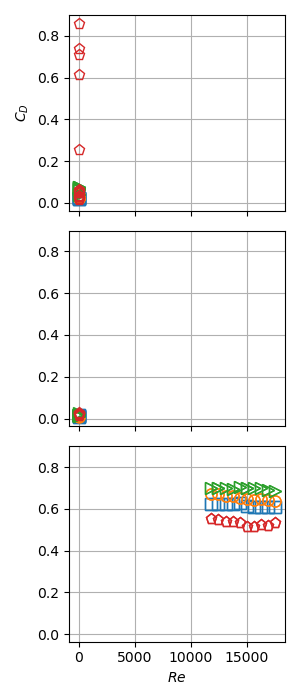

In [55]:
fig, ax = plt.subplots(3,1,sharey=True,figsize=(3,7),sharex=True)
ax0,ax1,ax2 = ax
for i,vali in enumerate(vals_50):
    ax0.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none')
  
for i,vali in enumerate(vals_75):
    ax1.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none')

for i, casoi in enumerate(casos_e1000):
    F_1000 = casoi.df['FD_m'][casoi.index_casos].to_numpy()
    U_1000 =  casoi.df['velocity'][casoi.index_casos].to_numpy()
    Fd_1000 = F_1000-F_soporte(U_1000)
    cd_1000 = Fd_1000 / (1/2*rho*U_1000**2*Sf)
    x,y = [[],[]]
    for Ui in U_1000:
        x.append(Ui*D/nu)
        y.append(cd_1000[U_1000 == Ui].mean())
        
    ax2.plot(x,y,marker=mks[i],linestyle='none',markersize=8,fillstyle='none')
    
ax1.grid()
#ax1.set_ylim([0,1])
ax0.grid()
ax0.set_ylabel('$C_D$')
#ax0.set_xlabel('$Re$')
ax2.set_xlabel('$Re$')
ax2.grid()
fig.tight_layout()

In [48]:
Largos  = np.array([0.75,1,1.25,1.5])

vals_75 = []
vals_50 = []
for i, lis in enumerate(Largos[:]):
    ax = plt.gca()
    data_obj_50 = get_dataframe(lista_objs,50,lis)  
   
    dataplot =  (data_obj_50).copy()
    #get_dataframe(lista_objs,75,data.freqn1.25)
    x = dataplot['$\\delta_0$'].to_numpy()*data.escala0/D
    y = rho*(dataplot['$U_\inf$']**2/2*dataplot['Largo']**4/dataplot['B']/8).to_numpy()
    #y = x/y 
    #x = dataplot['$U_\inf$']
    vals_50.append((x,y))

    data_obj_75 = get_dataframe(lista_objs,75,lis)  
    dataplot =  (data_obj_75).copy()
    #get_dataframe(lista_objs,75,1.25)
    x = dataplot['$\\delta_0$'].to_numpy()*data.escala0/D
    y = rho*(dataplot['$U_\inf$']**2/2*dataplot['Largo']**4/dataplot['B']/8).to_numpy()
    #y = x/y 
    #x = dataplot['$U_\inf$']
    vals_75.append((x,y))


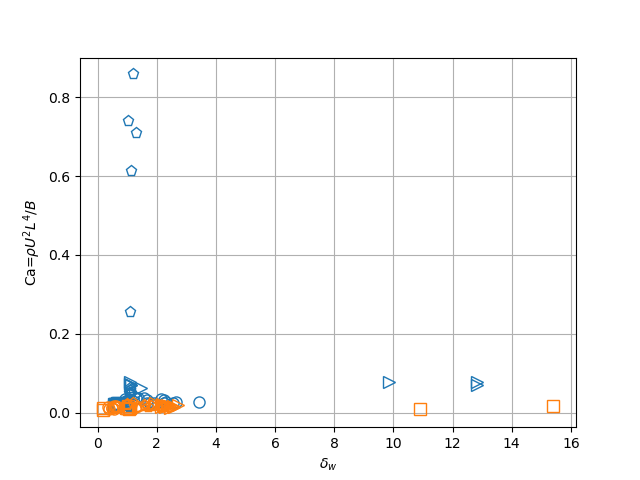

In [52]:
fig,ax = plt.subplots()
for i,vali in enumerate(vals_50):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none',color='tab:blue')
for i,vali in enumerate(vals_75):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none',color='tab:orange')
ax.set_ylabel(r'Ca=$\rho U^2 L^4/B$');
ax.set_xlabel(r'$\delta_w$')
ax.grid()

In [50]:
Largos  = np.array([0.75,1,1.25,1.5])

vals_75 = []
vals_50 = []
for i, lis in enumerate(Largos[:]):
    ax = plt.gca()
    data_obj_50 = get_dataframe(lista_objs,50,lis)  
   
    dataplot =  (data_obj_50).copy()
    #get_dataframe(lista_objs,75,1.25)
    y = dataplot['${\\delta_0}^\\prime$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_n$']**1/dataplot['$f_{\\max 1}$']**1).to_numpy()
    vals_50.append((x,y))

    data_obj_75 = get_dataframe(lista_objs,75,lis)  
    dataplot =  (data_obj_75).copy()
    #get_dataframe(lista_objs,75,1.25)
    y = dataplot['${\\delta_0}^\\prime$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_n$']**1/dataplot['$f_{\\max 1}$']**1).to_numpy()
    vals_75.append((x,y))

(0.0, 4.0)

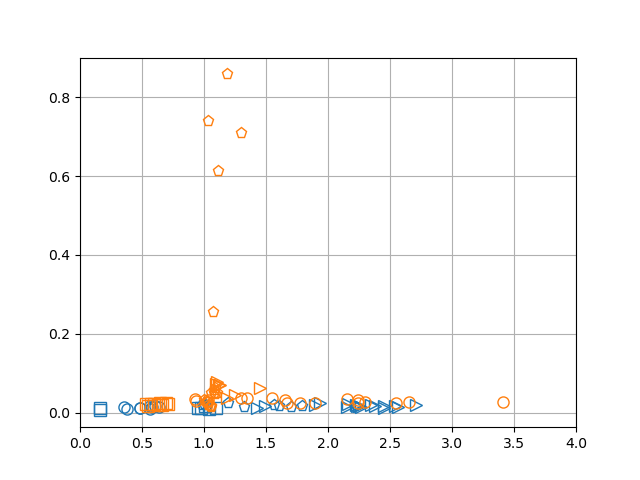

In [51]:
fig,ax = plt.subplots()
for i,vali in enumerate(vals_75):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none',color='tab:blue')
for i,vali in enumerate(vals_50):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=8,fillstyle='none',color='tab:orange')
ax.grid()
ax.set_xlim([0,4])

In [27]:
Largos  = np.array([0.75,1,1.25,1.5])

vals_75 = []
vals_50 = []
for i, lis in enumerate(Largos[:]):
    ax = plt.gca()
    data_obj_50 = get_dataframe(lista_objs,50,lis)  
   
    dataplot =  (data_obj_50).copy()
    #get_dataframe(lista_objs,75,1.25)
    y = dataplot['$\\delta_1$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_n$']**1/dataplot['$f_{\\max 1}$']**1).to_numpy()
    vals_50.append((x,y))

    data_obj_75 = get_dataframe(lista_objs,75,lis)  
    dataplot =  (data_obj_75).copy()
    #get_dataframe(lista_objs,75,1.25)
    y = dataplot['$\\delta_1$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_n$']**1/dataplot['$f_{\\max 1}$']**1).to_numpy()
    vals_75.append((x,y))

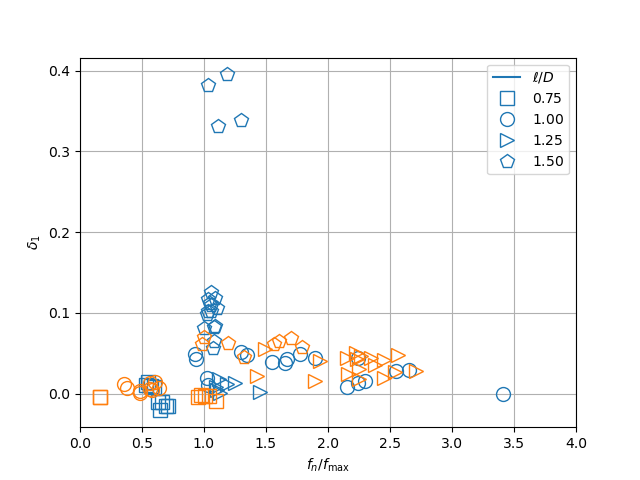

In [28]:
fig,ax = plt.subplots()
ax.plot([],[],label='$\ell/D$')
for i,vali in enumerate(vals_50):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=10,fillstyle='none',color='tab:blue',
           label=f'${Largos[i]:.2f}$')
for i,vali in enumerate(vals_75):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=10,fillstyle='none',color='tab:orange')
ax.grid()
ax.set_xlim([0,4])
ax.legend()
ax.set_xlabel('$f_n/f_\max$')
ax.set_ylabel('$\delta_1$');

In [29]:
Largos  = np.array([0.75,1,1.25,1.5])

vals_75 = []
vals_50 = []
for i, lis in enumerate(Largos[:]):
    ax = plt.gca()
    data_obj_50 = get_dataframe(lista_objs,50,lis)    
    dataplot =  (data_obj_50).copy()
    y = dataplot['$\\delta_1$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_{\\max 1}$']**1/(St_referencia*dataplot['$U_\\inf$']/D)).to_numpy()
    vals_50.append((x,y))

    data_obj_75 = get_dataframe(lista_objs,75,lis)  
    dataplot =  (data_obj_75).copy()
    y = dataplot['$\\delta_1$'].to_numpy()*data.escala0/D
    x = (dataplot['$f_{\\max 1}$']**1/(St_referencia*dataplot['$U_\\inf$']/D)).to_numpy()
    vals_75.append((x,y))

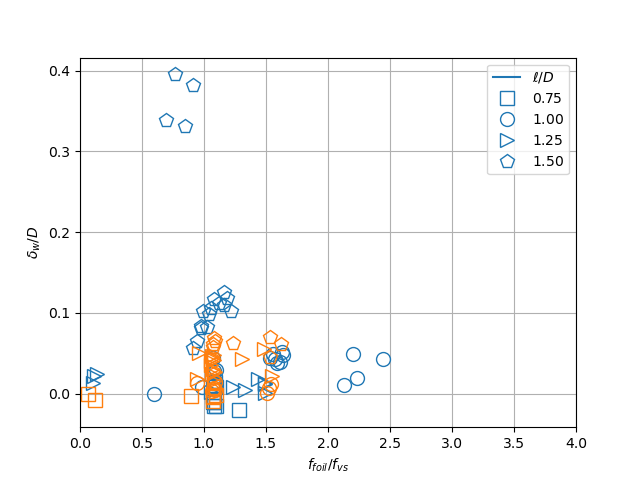

In [30]:
fig,ax = plt.subplots()
ax.plot([],[],label='$\ell/D$')
for i,vali in enumerate(vals_50):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=10,fillstyle='none',color='tab:blue',
           label=f'${Largos[i]:.2f}$')
for i,vali in enumerate(vals_75):
    ax.plot(vali[0],vali[1],marker=mks[i],linestyle='none',markersize=10,fillstyle='none',color='tab:orange')
ax.grid()
ax.set_xlim([0,4])
ax.legend()
ax.set_xlabel('$f_{foil}/f_{vs}$')
ax.set_ylabel('$\delta_w / D$');

In [31]:
#frecuencias 

# Esquema del modelo y vórtices

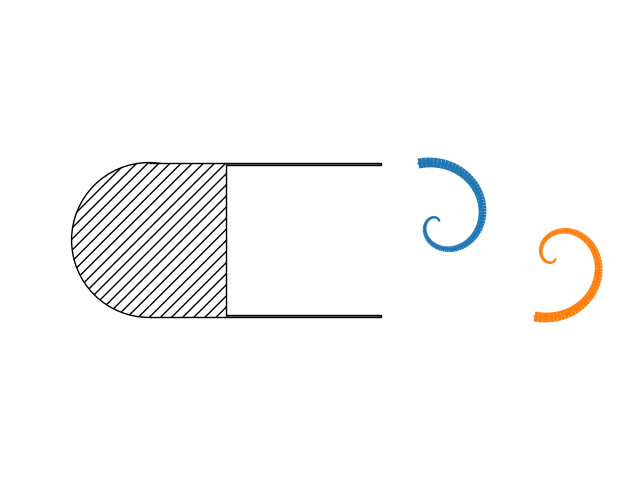

In [32]:
from matplotlib.patches import Rectangle, Circle, Polygon
from matplotlib.collections import LineCollection
fig,ax = plt.subplots()

                 
circle = Circle((0., 0), radius=4., edgecolor='black', facecolor='w',hatch='///')
 
ax.add_patch(circle)                
#ax.add_patch(rectangle) 
p1 = np.array([(0,4),(4,4),(4,-4),(0,-4)])
poly = Polygon(p1, edgecolor='black',closed=False,facecolor='w',hatch='///')
ax.add_patch (poly)
p2 = np.array([(4,3.9),(12,3.9),(12,4),(4,4)])
p3 = np.array([(4,-3.9),(12,-3.9),(12,-4),(4,-4)])
poly2 = Polygon(p2, edgecolor='black',closed=False,facecolor='gray')
poly3 = Polygon(p3, edgecolor='black',closed=False,facecolor='gray')
ax.add_patch (poly2)
ax.add_patch (poly3)
def vortex_im (xy,rot=0,orient=0,colorline='tab:orange'):
    theta = np.linspace(0,2*np.pi,100)
    r = theta*.5

    rot = rot+90

    zrot = r*np.exp(1j*theta) * np.exp(1j*rot*np.pi/180)



    x = np.real(zrot)+xy[0]
    y = np.imag(zrot)*(-1)**orient+xy[1] 
    lwidths = (1+theta)**1
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, linewidths=lwidths,color=colorline)
    return x,y,lc
    
x1,y1,lc1 = vortex_im((15,1),20,0,'tab:blue')
x2,y2,lc2 = vortex_im((21,-1),20,1,'tab:orange')


from matplotlib.collections import LineCollection



ax.add_collection(lc1)
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.add_collection(lc2)
ax.set_aspect('equal')
fig.tight_layout()
ax.axis('off');

In [33]:
p1.shape

(4, 2)

In [38]:
671913*1.03

692070.39